# Logistic Regression

> In this notebook, I am going to explore the beauty of logistic regression in a fish dataset.

### `About Dataset`
The fish market dataset is a collection of data related to various species of fish and their characteristics. This dataset is designed for polynomial and logistics regression analysis and contains several columns with specific informations.

- **Species:** This column represents the species of the fish. it is a categorical variable that categorizes each fish into one of seven species. The species include names like "Perch", "Beam", "Roach", "Pike", "Smelt", "Parkki" and "Whitefish". 
- **Weight** This columns represnts the fish's weight and it's measured in grams 
- **Length1:** This column represents the first measurement of the fish's length. It is a numerical variable typically measured in centimentres.
- **Length2:** This column represents the second measurement of the fish's length. It is also measured in centimeters.
- **Length3:** This column represents the second measurement of the fish's length. Similar to the previous two columns. 
- **Height** This column represents the height of the fish. It is a numerical variable measured in centimeters.
- **Width** This column represnts the width of the fish. It is measured in centimeters

[Dataset](https://kaggle.com/dataset/vipullrathod/fish-market)



Let me import the required libraries and load the dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols 
from scipy import stats 


In [38]:
# load dataset
fish = pd.read_csv(r"c:/users/danhaya/arewads/associate-data-scientist-in-python/data/Fish.csv")
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### `Data cleaning process`
At this stage I am going dive deeply through the `DataFrame` and explore the following:
- missing values
- outliers
- duplicate values
- Inconsistency in the unit and many more

In [3]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

The dataset has no missing values. That's excellent 

In [4]:
fish.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Length: 159, dtype: bool

The dataset also has no duplicate values as well

<Figure size 500x400 with 0 Axes>

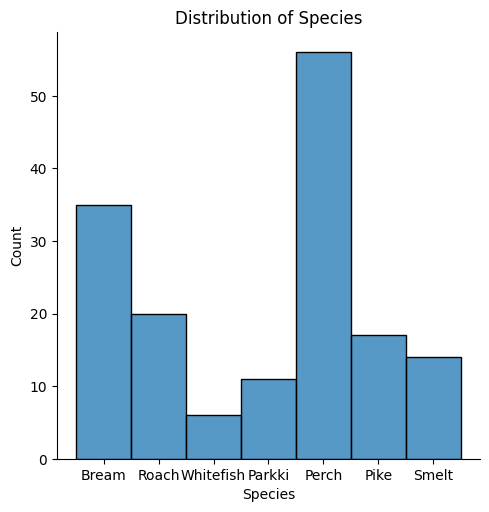

<Figure size 500x400 with 0 Axes>

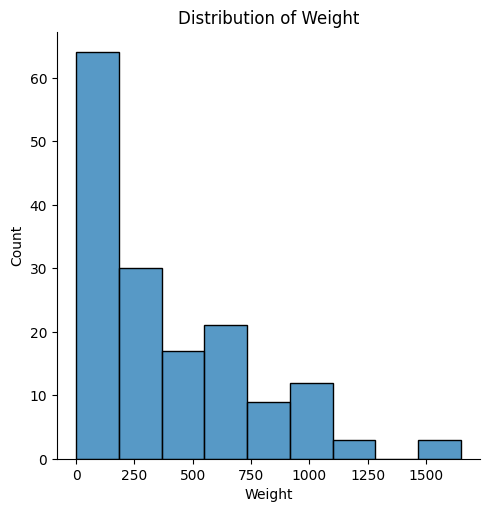

<Figure size 500x400 with 0 Axes>

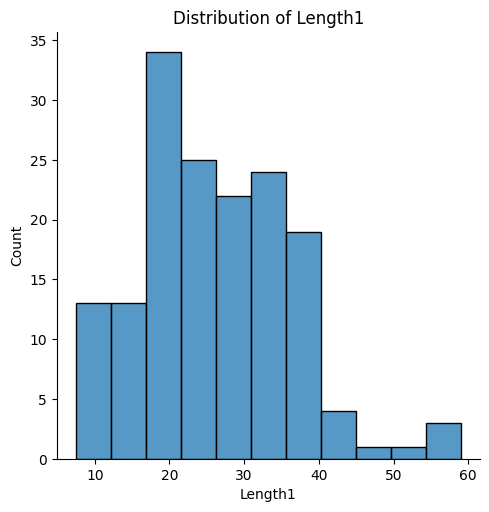

<Figure size 500x400 with 0 Axes>

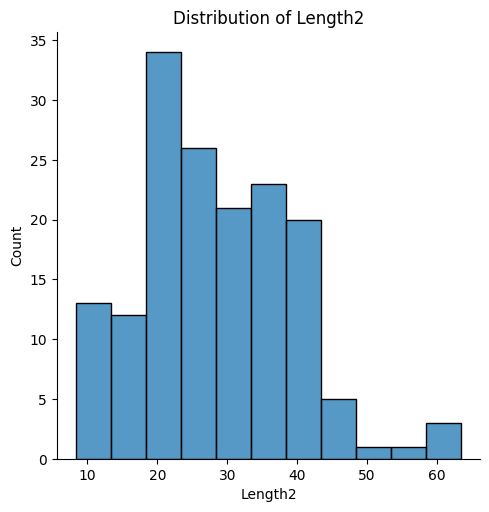

<Figure size 500x400 with 0 Axes>

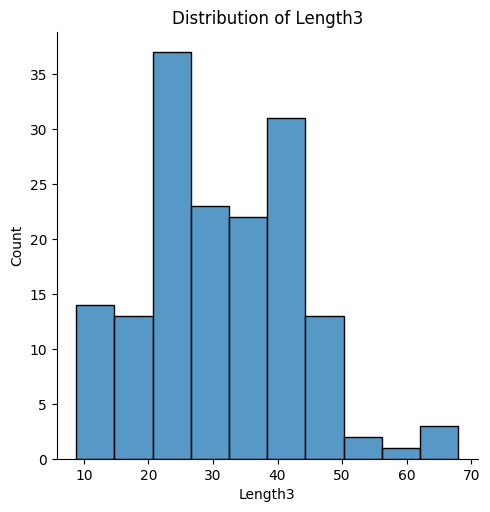

<Figure size 500x400 with 0 Axes>

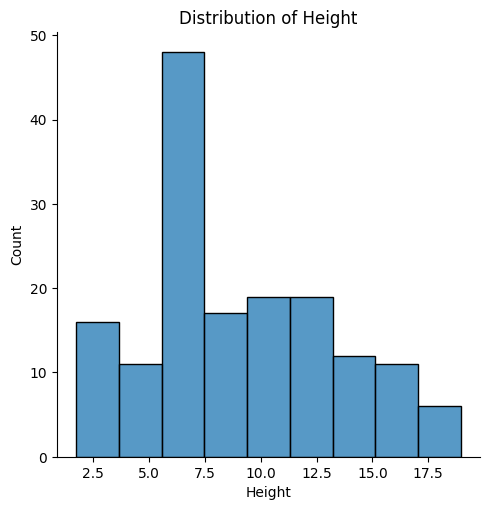

<Figure size 500x400 with 0 Axes>

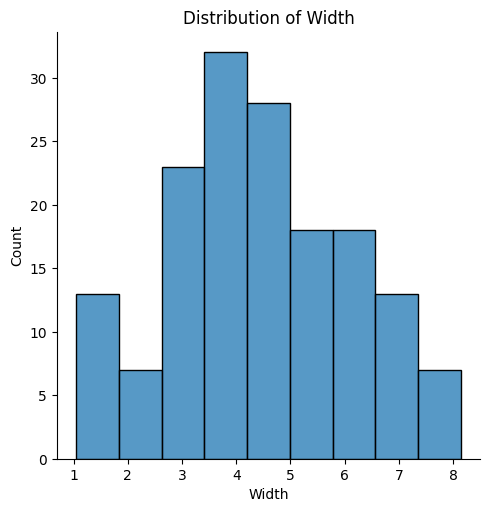

In [8]:
for col in fish.columns:
    plt.figure(figsize=(5, 4))
    sns.displot(fish[col])
    plt.title(f"Distribution of {col}")

plt.show()

In [9]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


From the describe statistics I start to think about having outlier in weight column. By looking at the mean around 400g while the maximun weight is 1650. let's plot it using boxplot and see

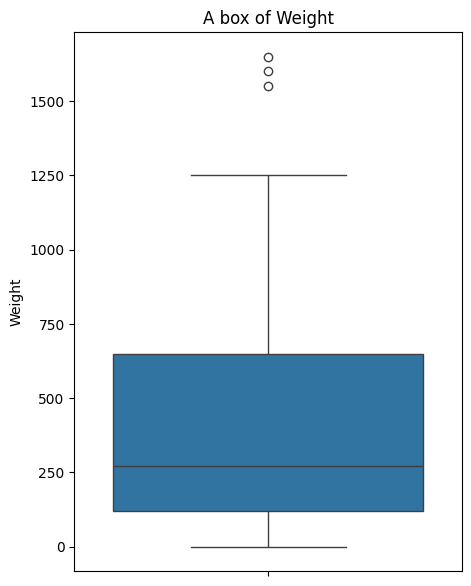

In [11]:
plt.figure(figsize=(5, 7))
sns.boxplot(y ='Weight', data = fish)
plt.title("A box of Weight")

plt.show()

In [39]:
iqr = stats.iqr(fish['Weight'])

In [40]:
lower_threshould = np.quantile(fish['Weight'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(fish['Weight'], 0.75) + 1.5 * iqr


fish = fish.drop(fish[(fish['Weight'] < lower_threshould)|(fish['Weight'] > upper_threshold)].index)


In [41]:
fish['Weight'].describe()

count     156.000000
mean      375.217308
std       319.546978
min         0.000000
25%       120.000000
50%       271.000000
75%       612.500000
max      1250.000000
Name: Weight, dtype: float64

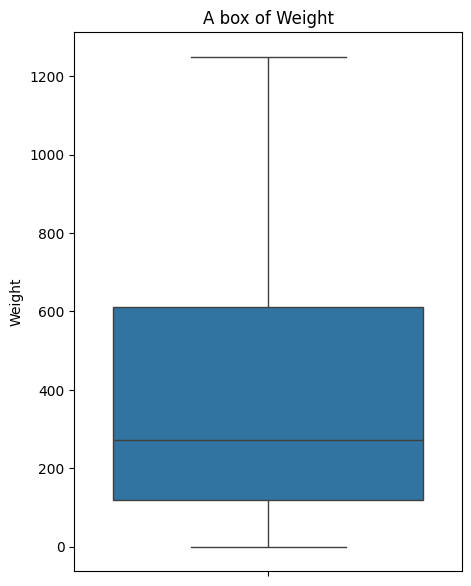

In [42]:
plt.figure(figsize=(5, 7))
sns.boxplot(y ='Weight', data = fish)
plt.title("A box of Weight")

plt.show()

That's excellent all the outliers were removed.

### `Modelling`
Hence the `DataFrame` is clean and ready let's perform a simple linear modelling with it using ols. But before le's visualize the weight distribution by species.

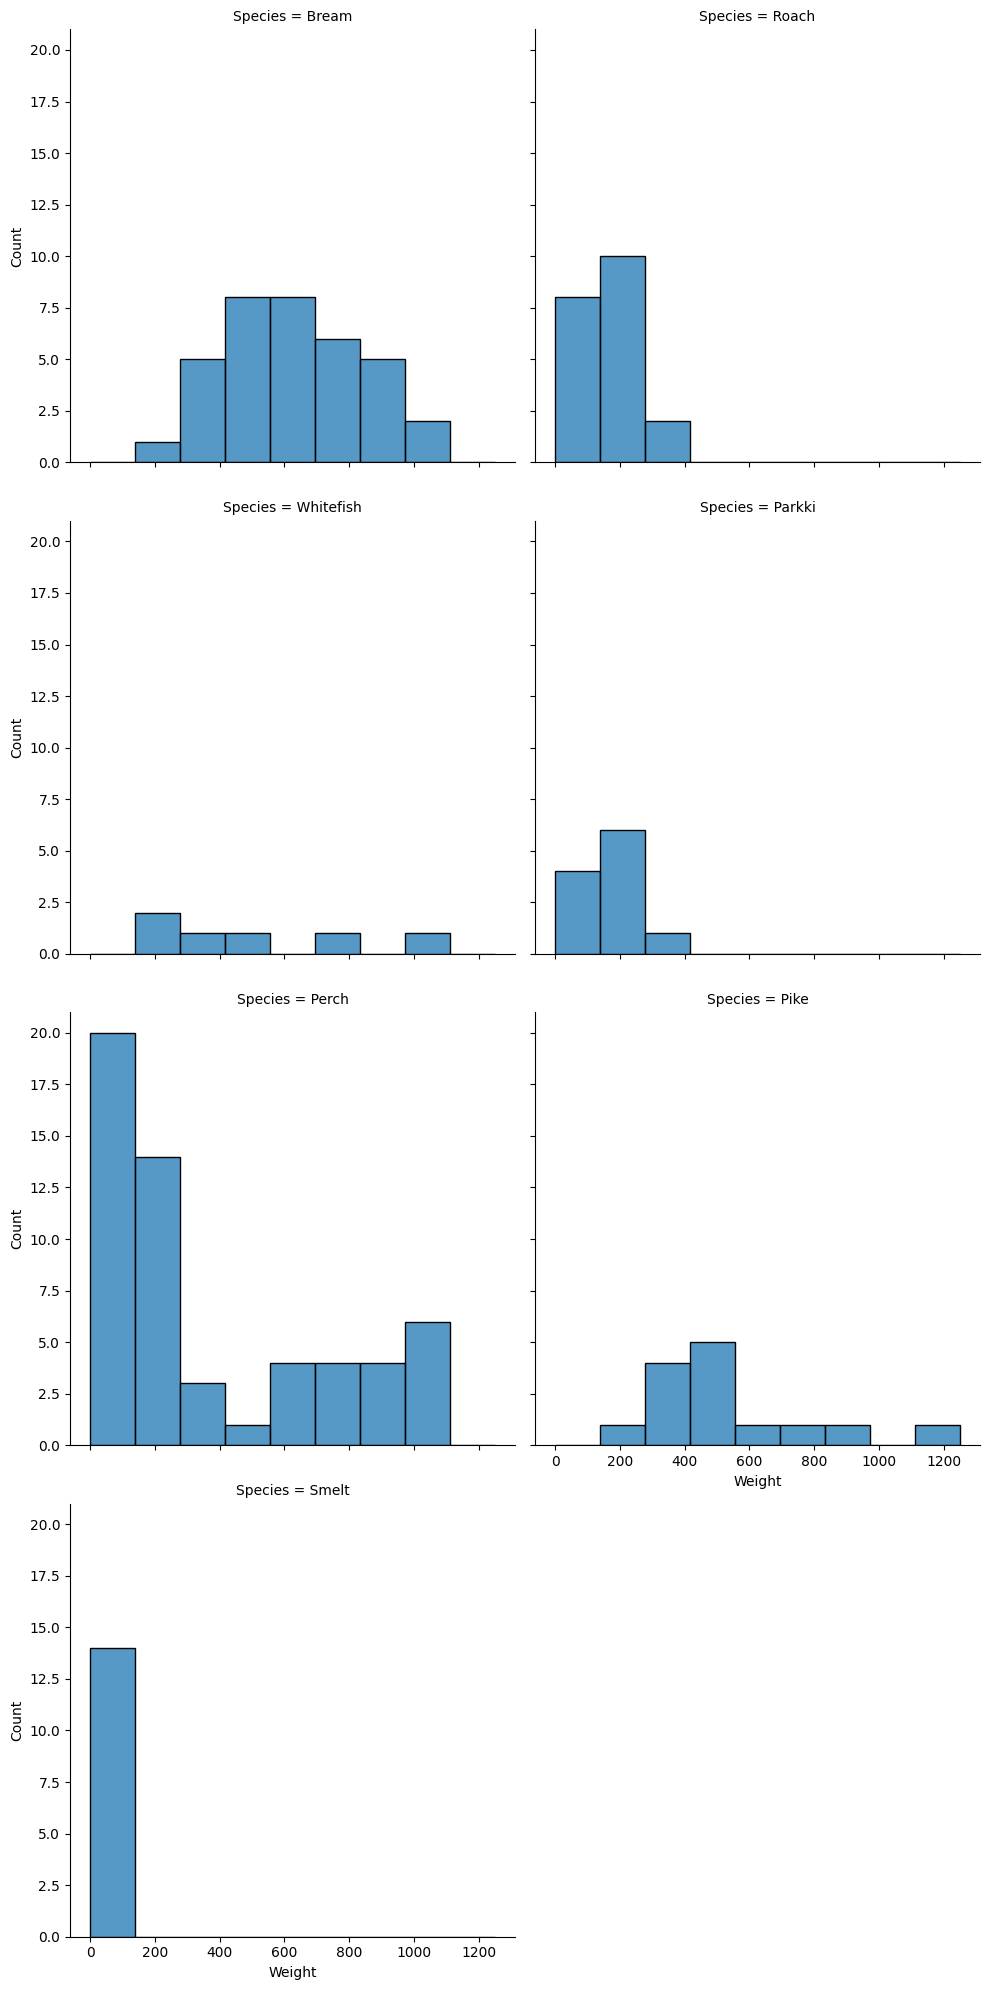

In [43]:
sns.displot(x = 'Weight',
            col = 'Species',
            data = fish,
            col_wrap= 2,
            bins = 9)
plt.show()

In [44]:
mdl_weight_vs_species = ols('Weight ~ Species + 0', data = fish).fit()
print(mdl_weight_vs_species.params)

Species[Bream]        617.828571
Species[Parkki]       154.818182
Species[Perch]        382.239286
Species[Pike]         529.857143
Species[Roach]        152.050000
Species[Smelt]         11.178571
Species[Whitefish]    531.000000
dtype: float64


### `Making Predictions`

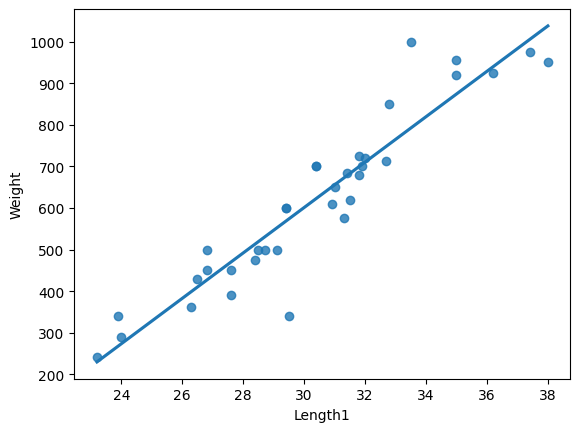

In [45]:
bream = fish[fish['Species'] == 'Bream']
sns.regplot(x = 'Length1',
            y='Weight',
            data = bream,
            ci = None)

plt.show()

from this plot, we can deduce that there's a strong positive relationship between length and weight.

In [46]:
mdl_weight_vs_length = ols('Weight ~ Length1', data=bream).fit()
print(mdl_weight_vs_length.params)

Intercept   -1035.347565
Length1        54.549981
dtype: float64


Let me set the explanatory variables to these values and see what value would response variable have

In [47]:
explanatory_data = pd.DataFrame({
    'Length1': np.arange(20, 41)
})

print(mdl_weight_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


Alternatively

In [48]:
prediction_data = explanatory_data.assign(Weight= mdl_weight_vs_length.predict(explanatory_data))
print(prediction_data)

    Length1       Weight
0        20    55.652054
1        21   110.202035
2        22   164.752015
3        23   219.301996
4        24   273.851977
5        25   328.401958
6        26   382.951939
7        27   437.501920
8        28   492.051901
9        29   546.601882
10       30   601.151863
11       31   655.701844
12       32   710.251825
13       33   764.801806
14       34   819.351787
15       35   873.901768
16       36   928.451749
17       37   983.001730
18       38  1037.551710
19       39  1092.101691
20       40  1146.651672


### `Showing Predictions`

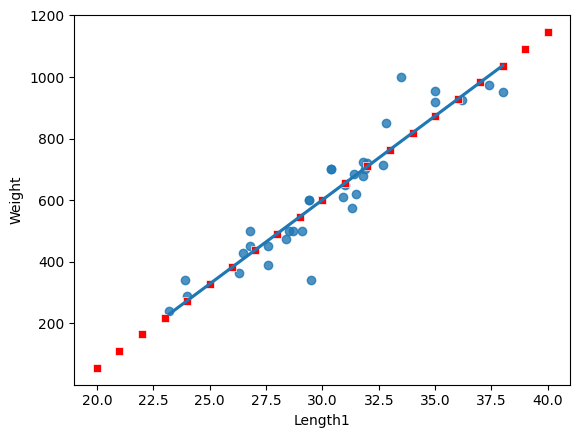

In [49]:
fig = plt.figure()
sns.regplot(x = 'Length1',
           y = 'Weight',
           data = bream,
           ci = None)

sns.scatterplot(x = 'Length1',
                y = 'Weight',
                data = prediction_data,
                color = 'red',
                marker = 's')

plt.show()

### `Model Accuracy`

To check for model accuracy we are going to explore the following parameters:
- Residual Standard Error (RSE)
- Root Mean Square Error (RMSE)

In [53]:
mse = mdl_weight_vs_length.mse_resid
print("mse: ", mse)

mse:  5498.555084973518


In [54]:
# Root mean square error
resid_sq = mdl_weight_vs_length.resid**2
resid_sum_of_sq = sum(resid_sq)
deg_freedom = len(bream.index) - 2
rse = np.sqrt(resid_sum_of_sq/deg_freedom)

print("RSE: ", rse)

RSE:  74.15224261594197


### `Visualizing model fit`


#### Residual plot

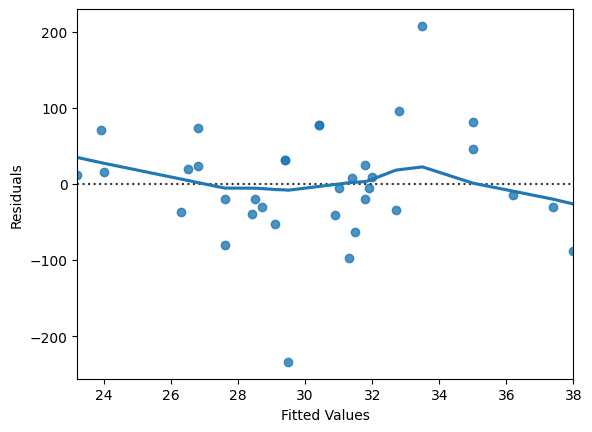

In [55]:
sns.residplot(
    x='Length1',
    y = 'Weight',
    data = bream,
    lowess= True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.show()

#### QQ plot

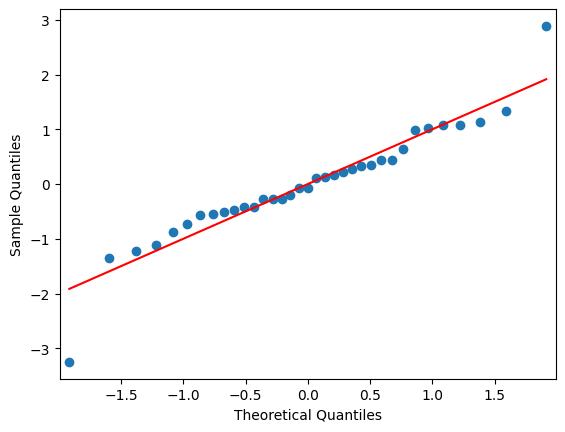

In [58]:
import statsmodels.api as sm

sm.qqplot(data=mdl_weight_vs_length.resid, fit=True, line='s')

plt.show()